I've just created my first **multi-category classifier** using Jeremy Howard's popular **fast ai** which is an astraction layer library built on top of the most world's used deep-learning library **PyTorch**. I've documented the process including the issues I faced (i.e. bugs) 

I found it more easier to digest and understand this process by splitting the steps into 3 parts:  

Part 1: Create **Learner** (.pkl file)  
Part 2: Create **Gradio** application file (app.py)    
Part 3: Host on **HuggingFace**

## Part 1: Create **Learner** (.pkl file) 

## 1.1 Install and import libraries

In [ ]:
!pip install timm
!pip install fastai 


In [4]:
from fastai.vision.all import *
import timm

## 1.2 Download Pets Breed Data

In [5]:
path = untar_data(URLs.PETS)/'images'

## 1.3 Create Data Loader

### 1.3.1 (A different) Labelling Function  

Here a different method to label our data was used:  

- In ['noodles vs rice' model](https://tonyjustdevs.github.io/blog/posts/2024-01-18-99_rice_vs_noodles/): There were two parent folders separating two categories of data: ```get_y=parent_label```  

- In ['saving a fast ai' model](https://tonyjustdevs.github.io/blog/posts/2024-01-19-99_saving_a_fastai_model/): There was a custom labelling function that looked for capital letters for cat breeds ```def is_cat(x): return x[0].isupper()```  

- In this model, I used **Regex** to find breed names before the last '_' in the file name:  ```label_func=RegexLabeller(pat=r'^([^/]+)_\d)```. See ```show_batch()``` output to see the file names examples.

Did you notice this is the **same dataset** as the is_cat model? So changing our label resulted in a different model!


### 1.3.2 Data Loader Code

In [6]:
pets_dataloaders =  ImageDataLoaders.from_name_func(
    '.',
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

c:\Users\tonyp\miniconda3\envs\fastai\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


## 1.4 Batch Examples, Create Learner, Fine-Tune and Export

I grouped these steps as the code are exactly the same in previous posts.

### 1.4.1 Batch Examples

This function is also a good way to find out what is the **file name structure** if we were not sure.

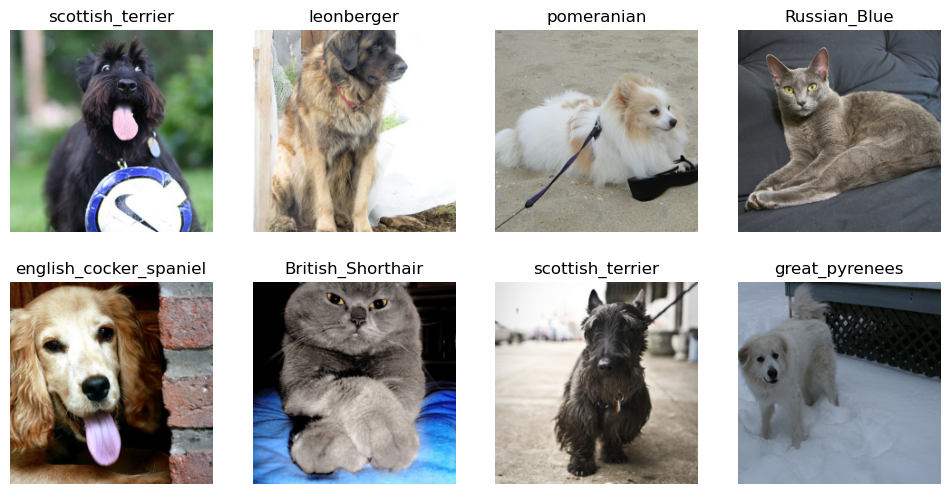

In [12]:
pets_dataloaders.show_batch(max_n=8)

### 1.4.2 Create Learner

I am still using resnet model architecture for starters [for reasons mentioned previously by Jeremy Howard](https://tonyjustdevs.github.io/blog/posts/2024-01-23-99-testing-different_archs/20240123_testing_different_archs.html#introduction)

In [7]:
pets_learner = vision_learner(pets_dataloaders, resnet34, metrics=error_rate)

### 1.4.3 Fine-Tune

In [ ]:
pets_learner.fine_tune(3) 

### 1.4.4 Export

In [ ]:
pets_learner.export('pets_learner.pkl')

## To be Continued...  
[Part 1: Create **Learner** (.pkl file)](https://tonyjustdevs.github.io/blog/posts/2024-01-24-99_multi_classifier/pt1_create_learner.html)   
[Part 2: Create **Gradio** application file (app.py)](https://tonyjustdevs.github.io/blog/posts/2024-01-25-99_gradio_app/)  
[Part 3: Host on **HuggingFace**](https://tonyjustdevs.github.io/blog/posts/2024-01-25-98_huggingface/)